<a href="https://colab.research.google.com/github/bala-codes/SENTIMENT-ANALYSIS-ON-AMAZON-PRODUCT-REVIEWS-USING-ML-AND-DL/blob/master/codes%20(ML)/Part-3%20Sentiment%20Analysis%20-%20Amazon%20Product%20Reviews%20-%20Single%20Prediction%20Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pickle
import string
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
%%time
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/PA_classifier.pkl", "rb") as fin:
  vectorizer, PA_classifier = pickle.load(fin)
 
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/SGD_calibrator_classifier.pkl", "rb") as fin:
  vectorizer, calibrator_classifier = pickle.load(fin)
 
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/SVC_classifier.pkl", "rb") as fin:
  vectorizer, SVC_classifier = pickle.load(fin)
 
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/bb_classifier.pkl", "rb") as fin:
  vectorizer, bb_classifier = pickle.load(fin)
 
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/nb_classifier.pkl", "rb") as fin:
  vectorizer, nb_classifier = pickle.load(fin)
 
with open("/content/drive/My Drive/Machine Learning Projects/SENTIMENT ANALYSIS - AMAZON CUSTOMER REVIEWS/SOURCE CODES AND DATASETS/PACKAGE 1 - SOURCE CODES AND FILES/Pretrained Models/logreg_classifier.pkl", "rb") as fin:
  vectorizer, logreg_classifier = pickle.load(fin)

print("SUCCESS ALL MODELS LOADED")

SUCCESS ALL MODELS LOADED
CPU times: user 14.4 s, sys: 1.97 s, total: 16.4 s
Wall time: 25.3 s


In [ ]:
all_punctuations = string.punctuation + '‘’,:”][],' 

def punc_remover(raw_text):
    no_punct = "".join([i for i in raw_text if i not in all_punctuations])
    return no_punct

def stopword_remover(no_punc_text):
    words = no_punc_text.split()
    no_stp_words = " ".join([i for i in words if i not in stopwords.words('english')])
    return no_stp_words

lemmer = nltk.stem.WordNetLemmatizer()
def lem(words):
    return " ".join([lemmer.lemmatize(word,'v') for word in words.split()])
    
def text_cleaner(raw):
    cleaned_text = stopword_remover(punc_remover(raw.lower()))
    return lem(cleaned_text)

In [ ]:
# Required Functions to predict the News
def prediction(text):
  test = vectorizer.transform(text)
  graph,output = ensemble(test)
  print("output", output)
  if output == 1:
    value = 'POSITIVE SENTIMENT'
  else:
    value = 'NEGATIVE SENTIMENT'

  class_labels = ['NEGATIVE','POSITIVE']
  j = [graph[0][0],graph[0][1]]
  y_pos = np.arange(len(class_labels))
  plt.barh(y_pos,j)
  plt.yticks(y_pos,class_labels)
  plt.title('PREDICTION FOR BEING POS VS NEG')
  plt.ylabel('Percentage')
  plt.xlabel('Labels')
  plt.show()
  print()
  start = "\033[1m"
  end = "\033[0;0m"
  print('THE GIVEN TEXT IS ' + start + str(value) + end)

def ensemble(x):
  pred1 = bb_classifier.predict_proba(x)
  pred2 = nb_classifier.predict_proba(x)
  pred3 = PA_classifier._predict_proba_lr(x)
  pred4 = logreg_classifier.predict_proba(x)
  pred5 = calibrator_classifier.predict_proba(x)
  pred6 = SVC_classifier._predict_proba_lr(x)

  test_pred_prob = np.mean([pred1, pred2, pred3, pred4, pred5, pred6], axis=0)
  pred = np.argmax(test_pred_prob, axis=1)
  return test_pred_prob,pred


# Give your Input Here

ENTER THE TEXT HERE : ENTER THE TEXT HERE : DONOT BUY THIS PRODUCT IT IS A UTTER WASTE OF TIME AND ENERGY, SO PLEASE DON'T
output [0]


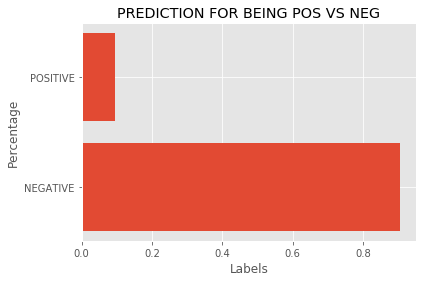


THE GIVEN TEXT IS NEGATIVE SENTIMENT
CPU times: user 316 ms, sys: 6.5 ms, total: 322 ms
Wall time: 2.2 s


In [ ]:
%%time
#String input
x = input("ENTER THE TEXT HERE : ")
x = text_cleaner(x)
x=[x,]
prediction(x)

ENTER THE TEXT HERE : The product was good, not bad at all.
output [0]


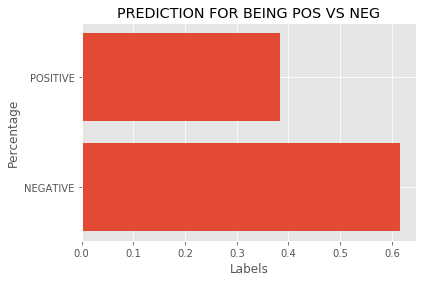


THE GIVEN TEXT IS NEGATIVE SENTIMENT
CPU times: user 2.26 s, sys: 24.8 ms, total: 2.29 s
Wall time: 9.77 s


In [ ]:
%%time
#String input
x = input("ENTER THE TEXT HERE : ")
x = text_cleaner(x)
x=[x,]
prediction(x)

ENTER THE TEXT HERE : The product was bad, not good at all.
output [0]


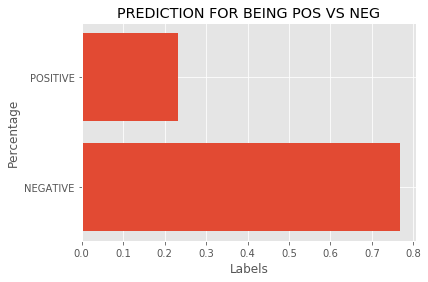


THE GIVEN TEXT IS NEGATIVE SENTIMENT
CPU times: user 358 ms, sys: 6.21 ms, total: 364 ms
Wall time: 6.73 s


In [ ]:
%%time
#String input
x = input("ENTER THE TEXT HERE : ")
x = text_cleaner(x)
x=[x,]
prediction(x)